In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Machine Learning in Cybersecurity
Professor : Shanchieh Yang<br>
Student   :   Vazgen Tadevosyan <br></p>




# Preprocessing
Creating datasets with different distributions

1. [Imports](#1)
2. [Preprocessing](#2)
 - [KNN for Missing Values](#3)
 - [Outliers](#4)
3. [Saving Data](#5)


<h3>Imports</h3> <a name="1"></a>


In [ ]:
#for not showing warnings
import os
import time
import glob
import warnings
warnings.filterwarnings('ignore')
#data manipulation and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from pandas import read_csv
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
#libraries for modelling and evaluation
from scipy import stats
#in case of error run <<!pip install>> and run the code again
#in case of error run <<!pip install 'missing library'>> and run the code again
pd.set_option('max_rows', 100)
pd.set_option('max_colwidth', 100)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 100]


In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/RIT/CyberSecurity/IDS2018.csv")
dataset.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,411.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
1,529.0,2.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
2,10882.0,3.0,4.0,326.0,129.0,326.0,0.0,108.666667,188.216188,112.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bot
3,333.0,1.0,1.0,40.0,56.0,40.0,40.0,40.000000,0.000000,56.0,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,985.0,3.0,0.0,77.0,0.0,46.0,0.0,25.666667,23.459184,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


<h1>Preprocessing<a name='2'></a></h1>

In [ ]:
dataset = dataset.replace([np.inf, -np.inf], np.nan)#Replacing Infinite values with NaN.

<h1>KNN for Flow Byts and for Flow packets<a name='3'></a></h1>

In [ ]:
#Note those 2 features were the ones with Infinite values
dataset.dropna(subset=[n for n in dataset if n not in ['Flow Byts/s','Flow Pkts/s']], inplace=True)
X1 = dataset.drop(columns = ['Flow Byts/s',"Label"])
X1.dropna(inplace=True)
y1 = dataset["Flow Byts/s"]
y1.dropna(inplace=True)
model1  = KNNImputer(n_neighbors=5)
model1.fit(X1,y1)
dataset.loc[:, ~dataset.columns.isin(['Flow Byts/s','Label'])] = model1.transform(dataset.loc[:, ~dataset.columns.isin(['Flow Byts/s','Label'])])

In [ ]:
X1 = dataset.drop(columns = ['Flow Pkts/s',"Label"])
X1.dropna(inplace=True)
y1 = dataset["Flow Pkts/s"]
y1.dropna(inplace=True)
model2  = KNNImputer(n_neighbors=5)
model2.fit(X1,y1)
dataset.loc[:, ~dataset.columns.isin(['Flow Pkts/s','Label'])] = model2.transform(dataset.loc[:, ~dataset.columns.isin(['Flow Pkts/s','Label'])])
dataset.reset_index(drop=True,inplace=True)
dataset.isna().any().sum()


0

<h1>Outliers<a name='4'></a></h1>

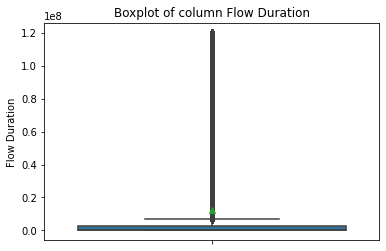

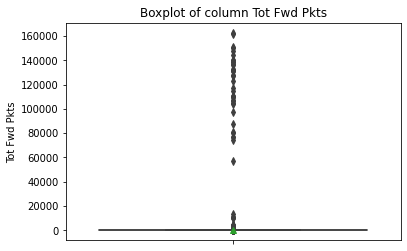

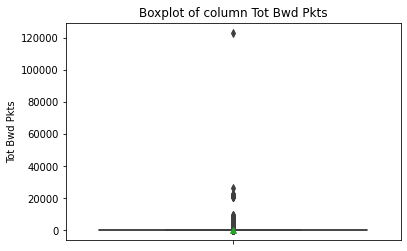

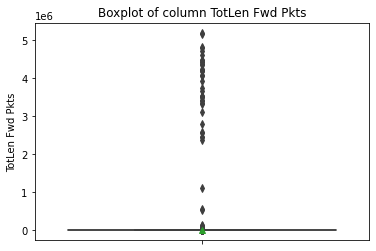

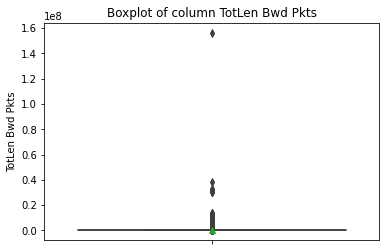

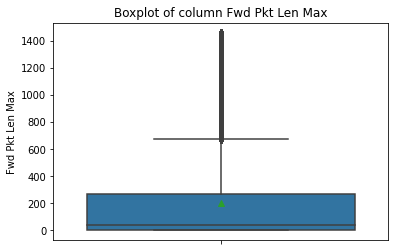

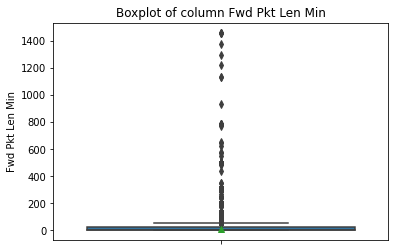

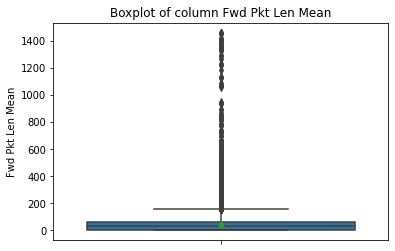

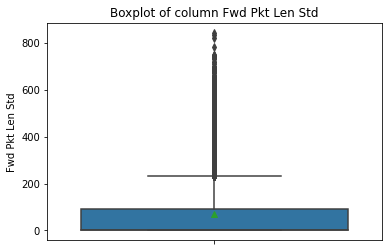

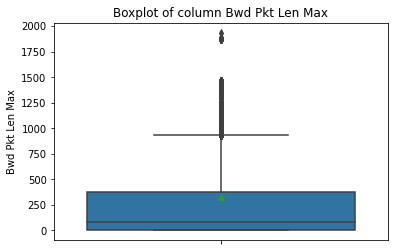

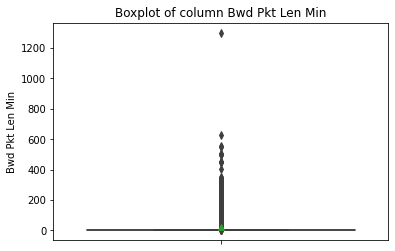

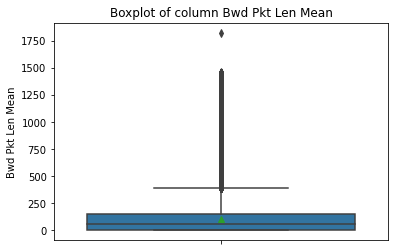

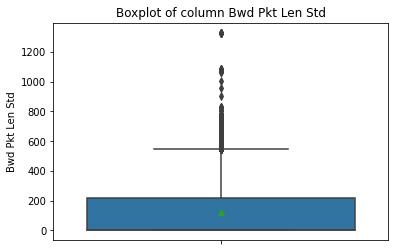

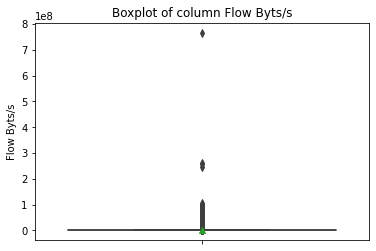

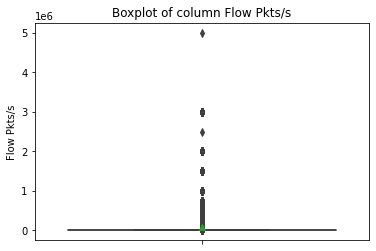

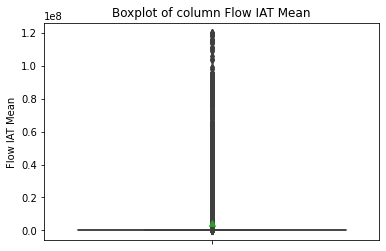

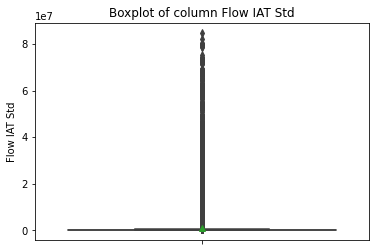

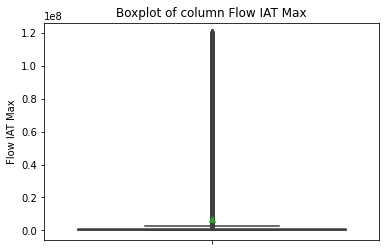

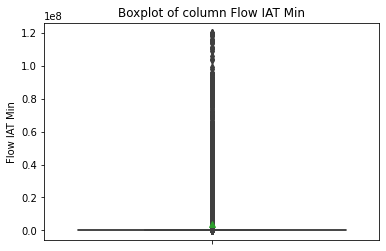

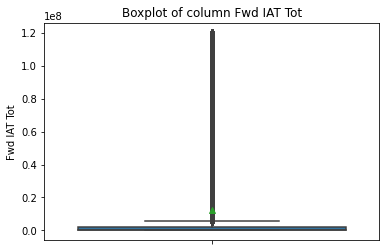

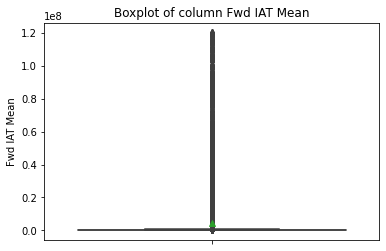

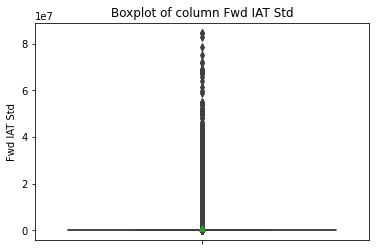

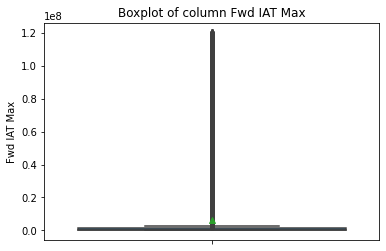

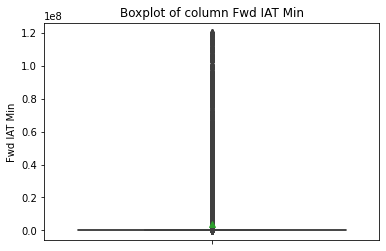

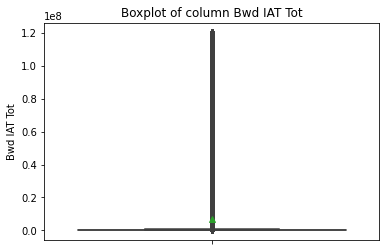

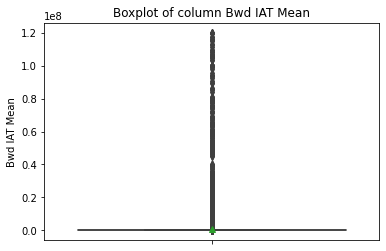

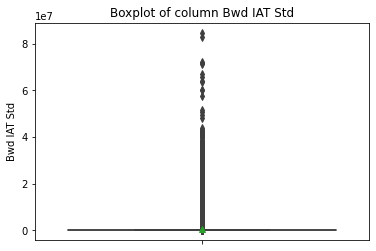

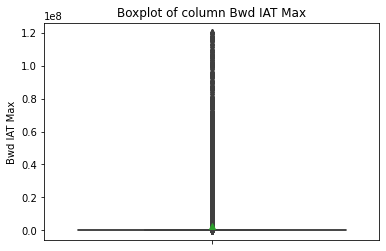

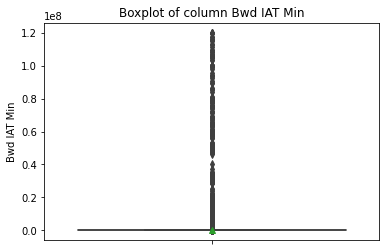

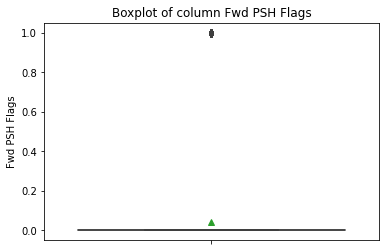

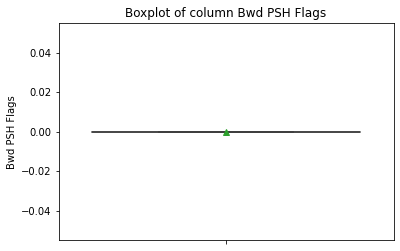

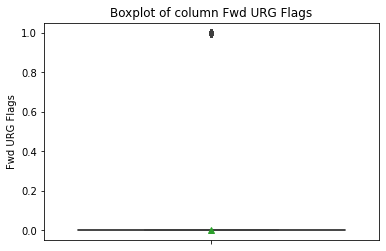

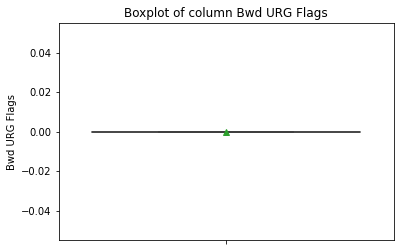

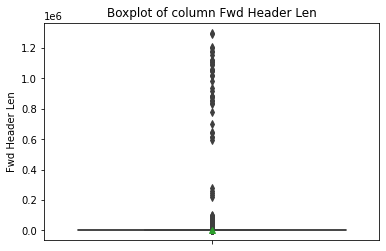

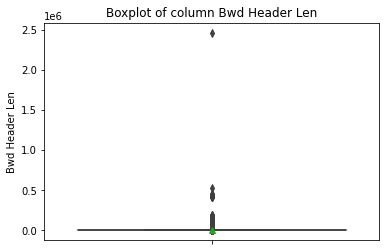

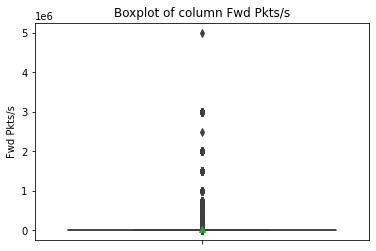

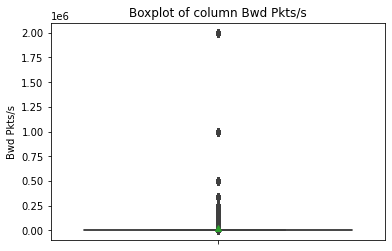

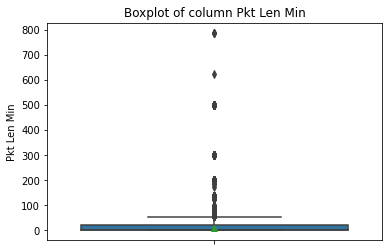

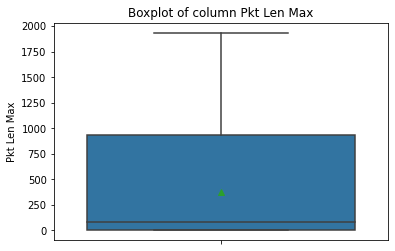

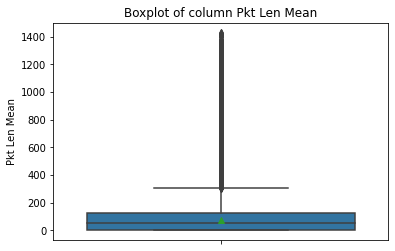

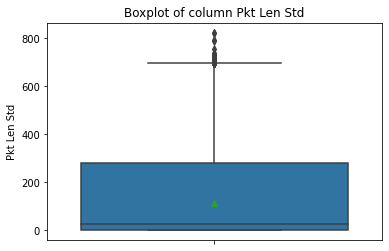

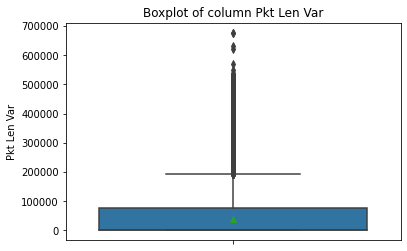

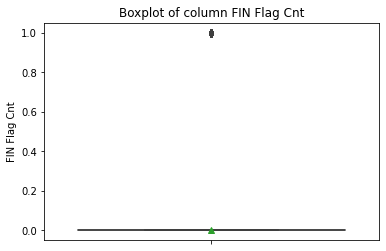

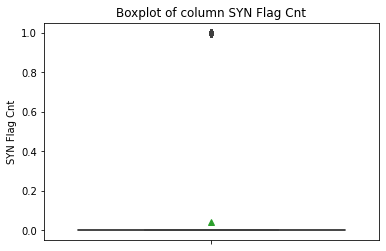

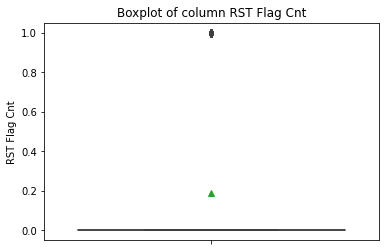

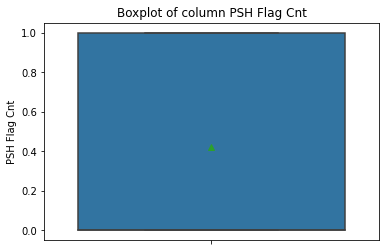

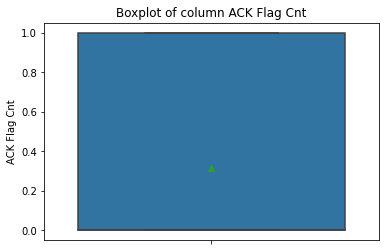

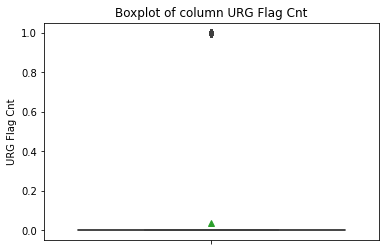

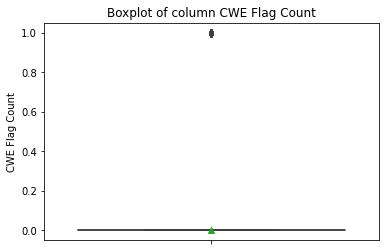

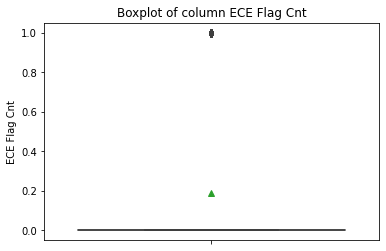

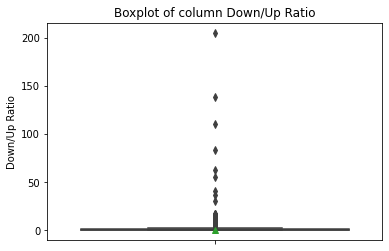

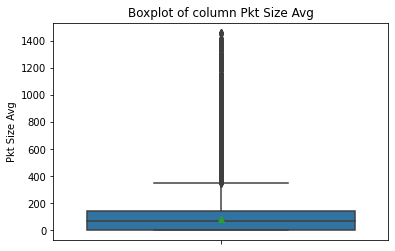

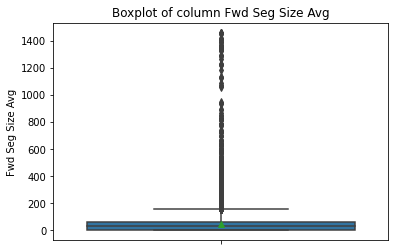

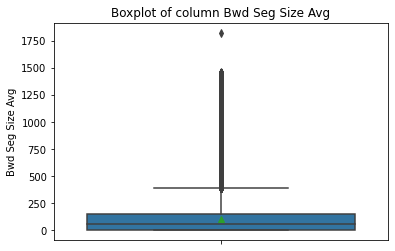

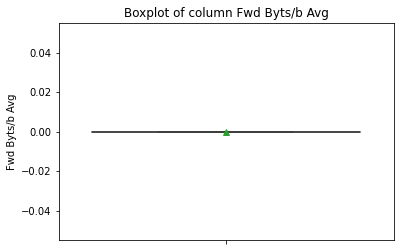

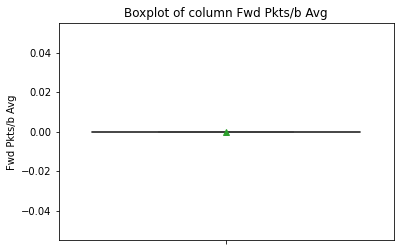

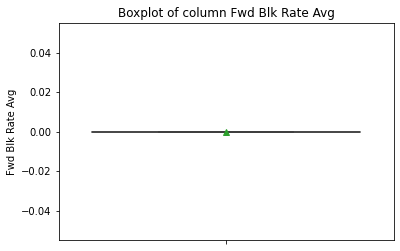

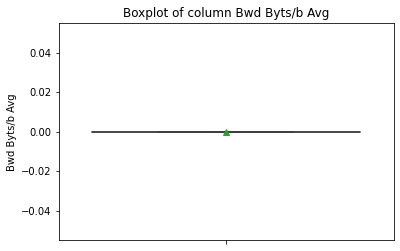

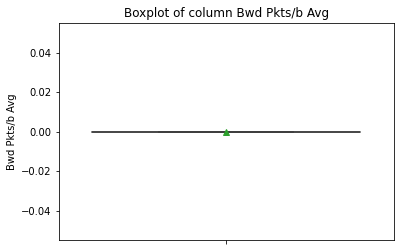

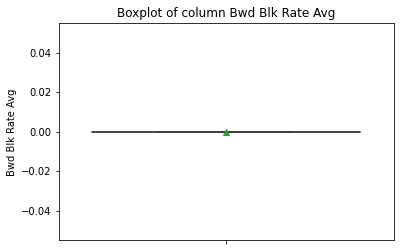

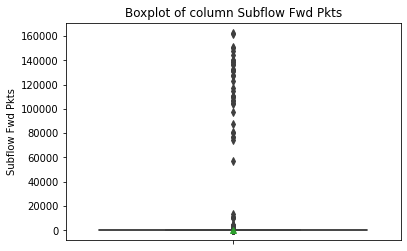

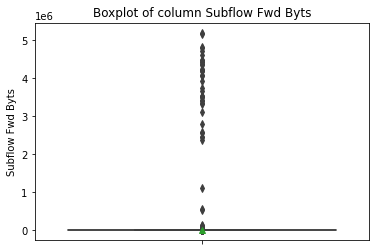

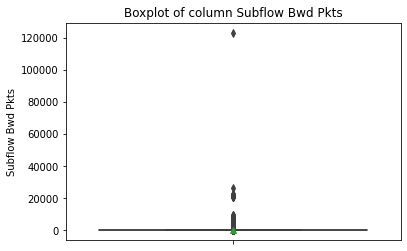

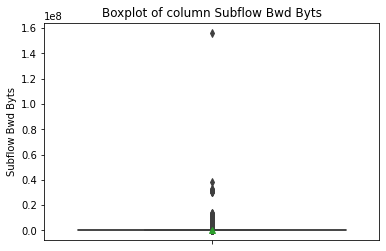

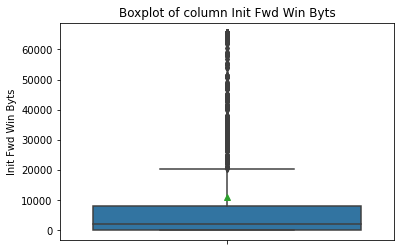

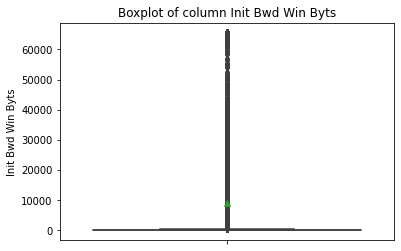

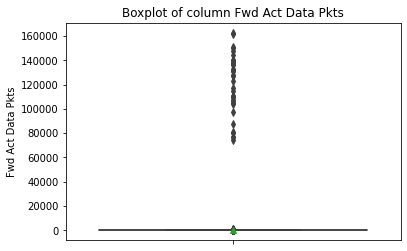

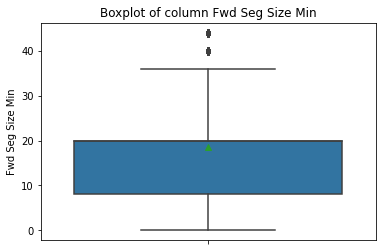

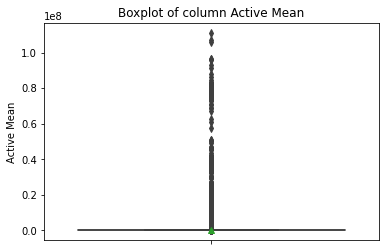

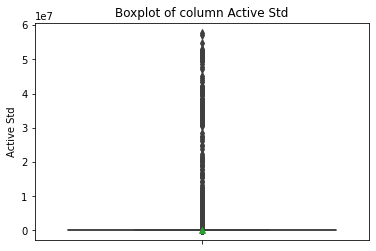

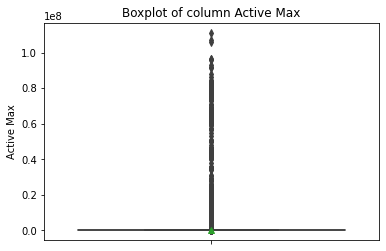

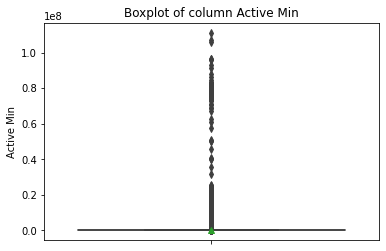

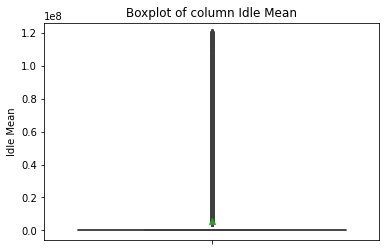

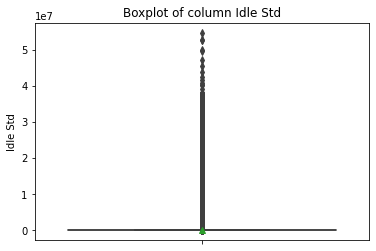

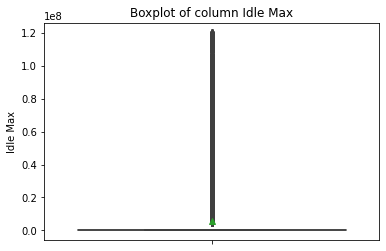

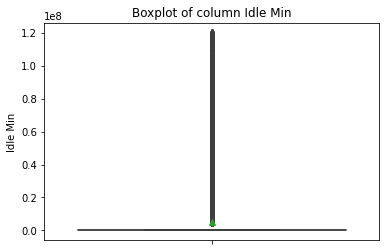

In [ ]:
for i in dataset.columns:
  if i!="Label":
      sns.boxplot(data=dataset,y=i,showmeans=True,fliersize=5)
      plt.title("Boxplot of column %s"% i)
      plt.show()

In [ ]:
## now lets count number of outliers in each columns
Q1 = dataset.quantile(0.25)#############
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).sum()

ACK Flag Cnt             0
Active Max           22107
Active Mean          22107
Active Min           22107
Active Std           15495
Bwd Blk Rate Avg         0
Bwd Byts/b Avg           0
Bwd Header Len       17701
Bwd IAT Max          53582
Bwd IAT Mean         53245
Bwd IAT Min          54168
Bwd IAT Std          54896
Bwd IAT Tot          54659
Bwd PSH Flags            0
Bwd Pkt Len Max      49476
Bwd Pkt Len Mean     10621
Bwd Pkt Len Min      59644
Bwd Pkt Len Std      11738
Bwd Pkts/b Avg           0
Bwd Pkts/s           43844
Bwd Seg Size Avg     10621
Bwd URG Flags            0
CWE Flag Count          55
Down/Up Ratio          489
ECE Flag Cnt         45426
FIN Flag Cnt           967
Flow Byts/s          39154
Flow Duration        36417
Flow IAT Max         49106
Flow IAT Mean        46284
Flow IAT Min         39614
Flow IAT Std         35156
Flow Pkts/s          38562
Fwd Act Data Pkts    56412
Fwd Blk Rate Avg         0
Fwd Byts/b Avg           0
Fwd Header Len       17189
F

In [ ]:
colums_with_outliers=((dataset < (Q1 - 1.5 * IQR)) | (dataset > (Q3 + 1.5 * IQR))).sum()
colums_with_outliers=colums_with_outliers[colums_with_outliers>0].index.tolist()
colums_with_outliers##we do this to have names of columns where we have outliers

['Active Max',
 'Active Mean',
 'Active Min',
 'Active Std',
 'Bwd Header Len',
 'Bwd IAT Max',
 'Bwd IAT Mean',
 'Bwd IAT Min',
 'Bwd IAT Std',
 'Bwd IAT Tot',
 'Bwd Pkt Len Max',
 'Bwd Pkt Len Mean',
 'Bwd Pkt Len Min',
 'Bwd Pkt Len Std',
 'Bwd Pkts/s',
 'Bwd Seg Size Avg',
 'CWE Flag Count',
 'Down/Up Ratio',
 'ECE Flag Cnt',
 'FIN Flag Cnt',
 'Flow Byts/s',
 'Flow Duration',
 'Flow IAT Max',
 'Flow IAT Mean',
 'Flow IAT Min',
 'Flow IAT Std',
 'Flow Pkts/s',
 'Fwd Act Data Pkts',
 'Fwd Header Len',
 'Fwd IAT Max',
 'Fwd IAT Mean',
 'Fwd IAT Min',
 'Fwd IAT Std',
 'Fwd IAT Tot',
 'Fwd PSH Flags',
 'Fwd Pkt Len Max',
 'Fwd Pkt Len Mean',
 'Fwd Pkt Len Min',
 'Fwd Pkt Len Std',
 'Fwd Pkts/s',
 'Fwd Seg Size Avg',
 'Fwd Seg Size Min',
 'Fwd URG Flags',
 'Idle Max',
 'Idle Mean',
 'Idle Min',
 'Idle Std',
 'Init Bwd Win Byts',
 'Init Fwd Win Byts',
 'Pkt Len Mean',
 'Pkt Len Min',
 'Pkt Len Std',
 'Pkt Len Var',
 'Pkt Size Avg',
 'RST Flag Cnt',
 'SYN Flag Cnt',
 'Subflow Bwd Byts',
 '

In [ ]:
corrected=dataset.copy()
for i in  colums_with_outliers:
    corrected[i]=stats.mstats.winsorize(np.array(dataset[i]),inplace=True,limits=0.05)

In [ ]:
## now lets count number of outliers in each columns
Q1 = corrected.quantile(0.25)#############
Q3 = corrected.quantile(0.75)
IQR = Q3 - Q1
((corrected < (Q1 - 1.5 * IQR)) | (corrected > (Q3 + 1.5 * IQR))).sum()

ACK Flag Cnt             0
Active Max           22107
Active Mean          22107
Active Min           22107
Active Std           15495
Bwd Blk Rate Avg         0
Bwd Byts/b Avg           0
Bwd Header Len       17701
Bwd IAT Max          53582
Bwd IAT Mean         53245
Bwd IAT Min          54168
Bwd IAT Std          54896
Bwd IAT Tot          54659
Bwd PSH Flags            0
Bwd Pkt Len Max      49476
Bwd Pkt Len Mean         0
Bwd Pkt Len Min      59644
Bwd Pkt Len Std          0
Bwd Pkts/b Avg           0
Bwd Pkts/s           43844
Bwd Seg Size Avg         0
Bwd URG Flags            0
CWE Flag Count           0
Down/Up Ratio            0
ECE Flag Cnt         45426
FIN Flag Cnt             0
Flow Byts/s          39154
Flow Duration        36417
Flow IAT Max         49106
Flow IAT Mean        46284
Flow IAT Min         39614
Flow IAT Std         35156
Flow Pkts/s          38562
Fwd Act Data Pkts    56412
Fwd Blk Rate Avg         0
Fwd Byts/b Avg           0
Fwd Header Len       17189
F

In [ ]:
dataset = corrected

In [ ]:
## excluding less frequent labels
labels = dataset["Label"].value_counts().index[-3:]
dataset = dataset.loc[~dataset["Label"].isin(labels)]
dataset.reset_index(drop=True, inplace=True)

In [ ]:
print(len(dataset))
print(dataset['Label'].nunique())
dataset['Label'].unique()

239201
11


array(['Bot', 'Benign', 'DoS attacks-Hulk', 'DoS attacks-SlowHTTPTest',
       'DDoS attacks-LOIC-HTTP', 'Infilteration', 'DoS attacks-GoldenEye',
       'DoS attacks-Slowloris', 'FTP-BruteForce', 'SSH-Bruteforce',
       'DDOS attack-HOIC'], dtype=object)

In [ ]:
df = dataset.sample(frac=0.2, replace=False, random_state=1)#getting small portion for data for training 
print(len(df))
print(df['Label'].nunique())
df['Label'].unique()
df['Label'].value_counts()

47840
11


Benign                      39051
DDOS attack-HOIC             2369
DoS attacks-SlowHTTPTest     2219
DDoS attacks-LOIC-HTTP       1109
DoS attacks-Hulk              910
Infilteration                 777
Bot                           532
FTP-BruteForce                404
SSH-Bruteforce                357
DoS attacks-GoldenEye          87
DoS attacks-Slowloris          25
Name: Label, dtype: int64

<h1>Saving Data<a name='5'></a></h1>

In [ ]:
df = df.loc[~df['Label'].isin(['DoS attacks-Slowloris','DDOS attack-LOIC-UDP'])]
dataset = dataset.loc[~dataset['Label'].isin(["Benign",'DoS attacks-Slowloris','DDOS attack-LOIC-UDP'])]
dataset.to_csv("/content/drive/MyDrive/RIT/CyberSecurity/Data/preprocessed_for_clustering.csv",index=False)
df.to_csv("/content/drive/MyDrive/RIT/CyberSecurity/Data/preprocessed.csv",index=False)